Checking matplotlib configuration...
Available matplotlib styles:
  - Solarize_Light2
  - _classic_test_patch
  - _mpl-gallery
  - _mpl-gallery-nogrid
  - bmh
  - classic
  - dark_background
  - fast
  - fivethirtyeight
  - ggplot
  - grayscale
  - seaborn
  - seaborn-bright
  - seaborn-colorblind
  - seaborn-dark
  - seaborn-dark-palette
  - seaborn-darkgrid
  - seaborn-deep
  - seaborn-muted
  - seaborn-notebook
  - seaborn-paper
  - seaborn-pastel
  - seaborn-poster
  - seaborn-talk
  - seaborn-ticks
  - seaborn-white
  - seaborn-whitegrid
  - tableau-colorblind10

Generating MovieNow Business Intelligence Visualizations...
1. Creating Country Performance Dashboard...


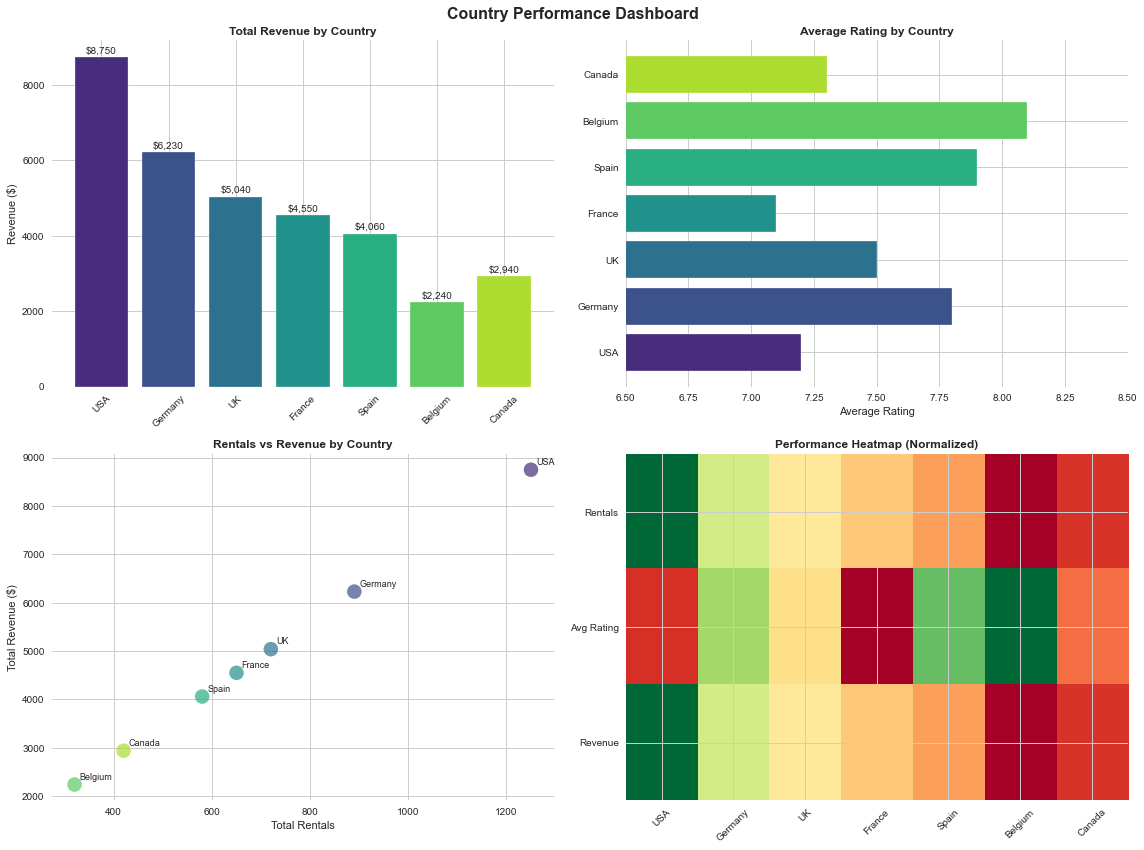

2. Creating Genre Analysis...


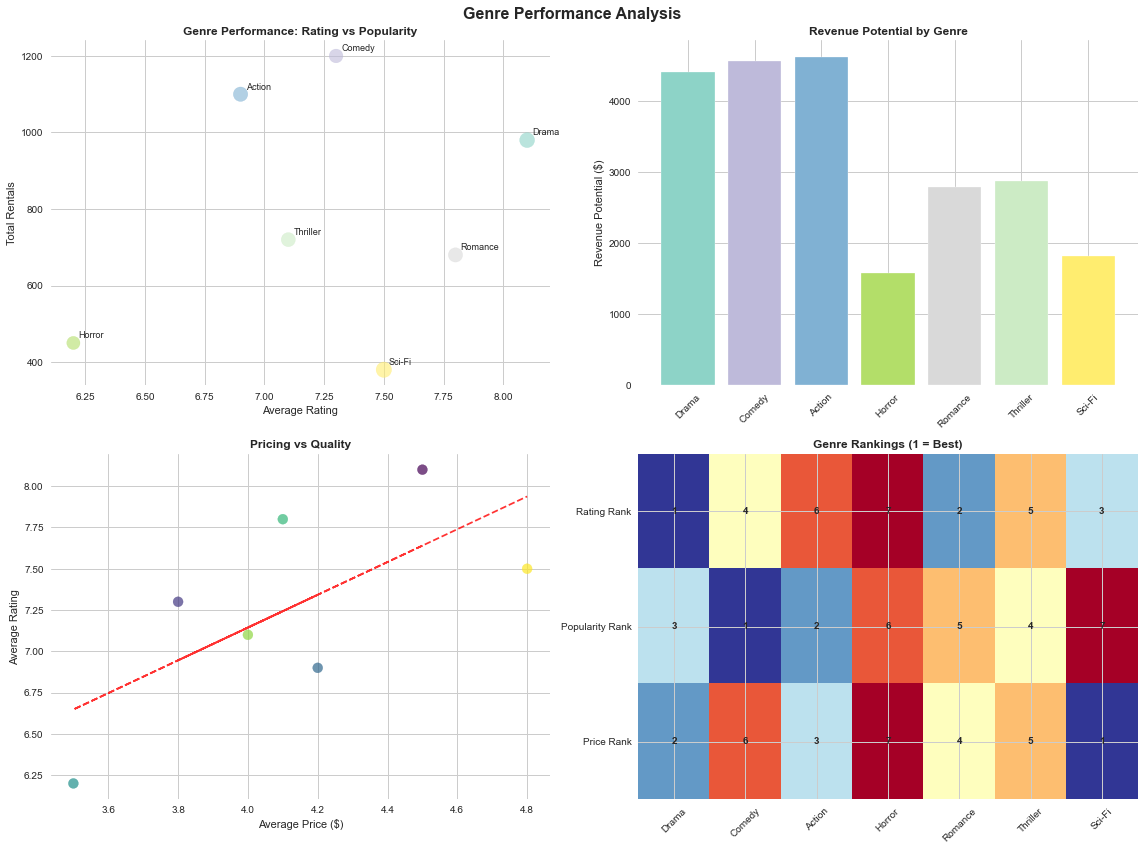

3. Creating Customer Segmentation...


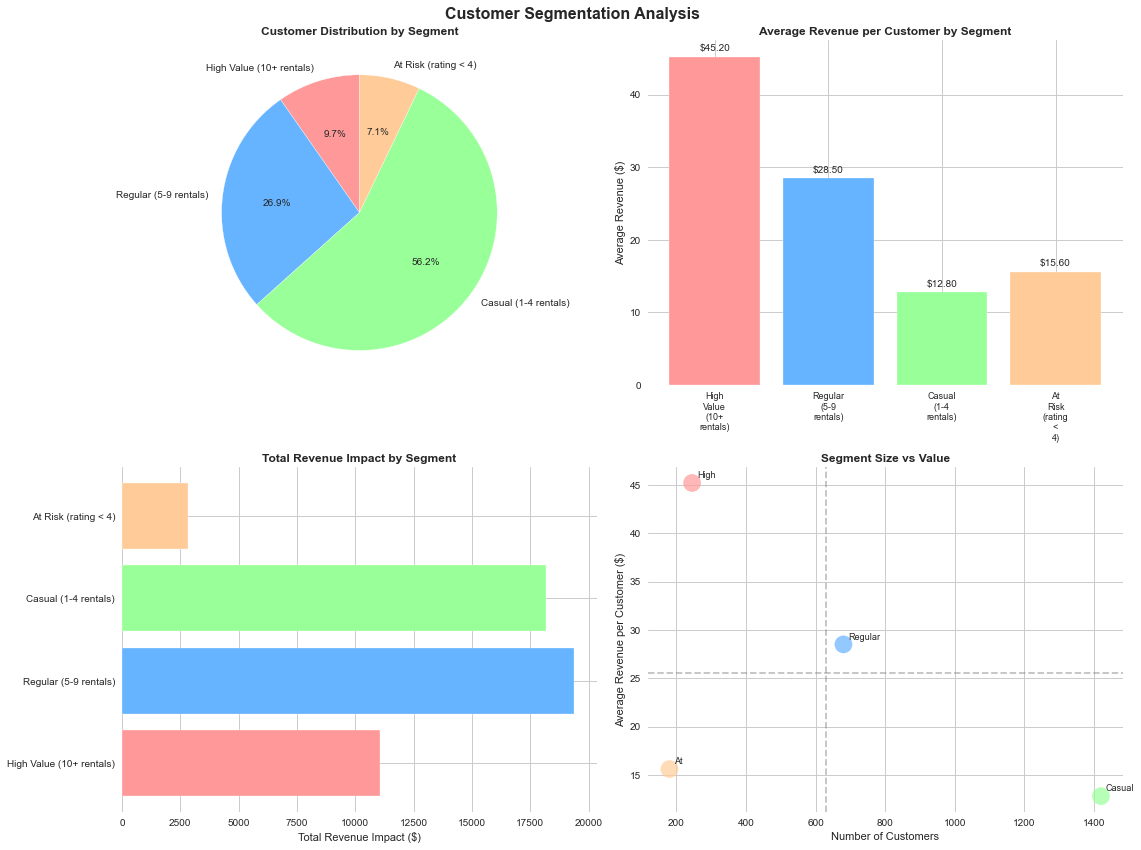

4. Creating Temporal Analysis...


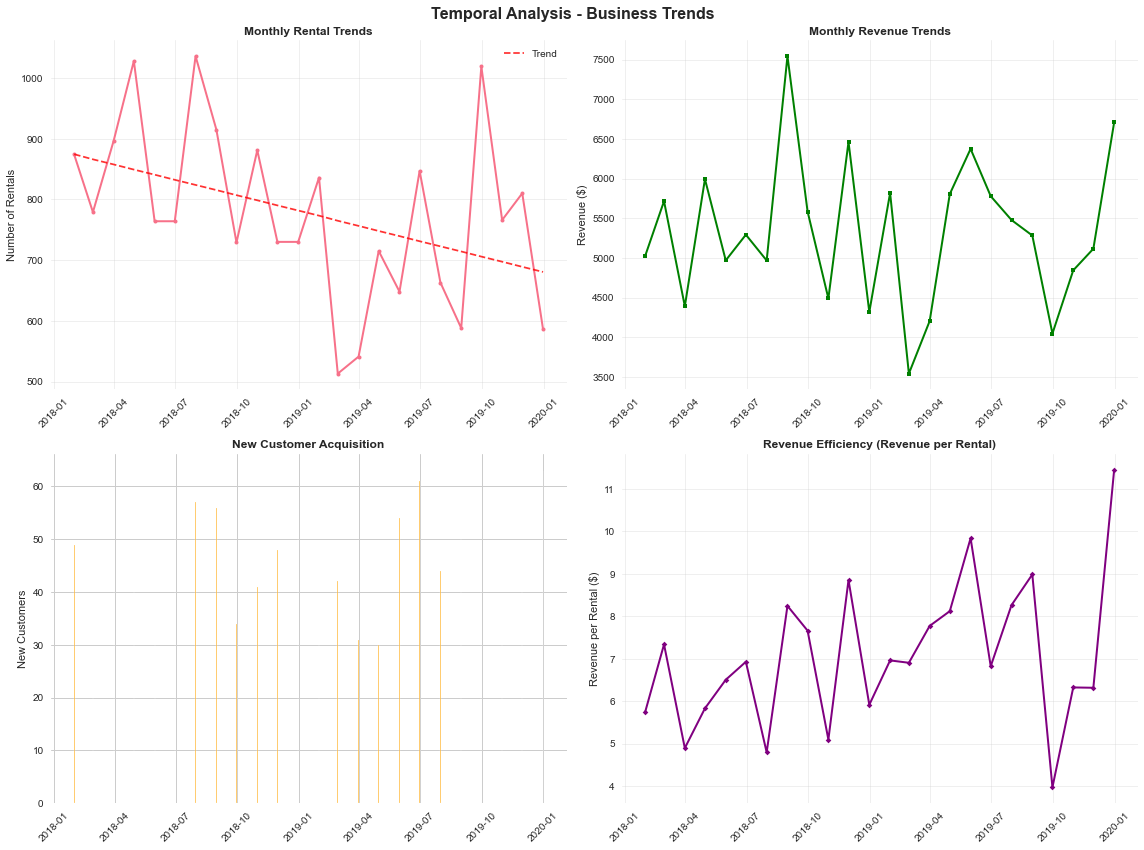

5. Creating Interactive Dashboard...
Interactive dashboard saved as 'visualizations/interactive_dashboard.html'

All visualizations generated successfully!
Files saved in 'visualizations/' directory:
- country_performance_dashboard.png
- genre_analysis.png
- customer_segmentation.png
- temporal_analysis.png
- interactive_dashboard.html

MOVIENOW BUSINESS INTELLIGENCE - SUMMARY STATS
Countries Analyzed: 7
Genres Analyzed: 7
Customer Segments: 4
Time Period: 24 months


In [8]:
#!/usr/bin/env python3
"""
MovieNow Business Intelligence - Data Visualizations
=====================================================
Python script to create compelling visualizations from SQL analysis results.
This script generates charts and graphs for the MovieNow business intelligence project.

Requirements:
    pip install pandas matplotlib seaborn plotly psycopg2-binary python-dotenv

Usage:
    python visualizations.py
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots - Fixed for compatibility
try:
    # Try the old seaborn style first
    plt.style.use('seaborn-v0_8')
except OSError:
    try:
        # Try the new seaborn style
        plt.style.use('seaborn')
    except OSError:
        # Fall back to a default matplotlib style
        plt.style.use('default')
        print("Note: Using default matplotlib style. For better visuals, consider updating matplotlib/seaborn.")

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("husl")

class MovieNowVisualizer:
    """Class to handle all MovieNow data visualizations"""
    
    def __init__(self):
        """Initialize the visualizer with sample data based on SQL analysis"""
        self.setup_sample_data()
        self.create_output_directory()
    
    def create_output_directory(self):
        """Create directory for saving visualizations"""
        import os
        if not os.path.exists('visualizations'):
            os.makedirs('visualizations')
    
    def setup_sample_data(self):
        """Create sample datasets based on SQL analysis results"""
        
        # Sample data for Country Performance (based on KPI analysis)
        self.country_kpis = pd.DataFrame({
            'country': ['USA', 'Germany', 'UK', 'France', 'Spain', 'Belgium', 'Canada'],
            'total_rentals': [1250, 890, 720, 650, 580, 320, 420],
            'avg_rating': [7.2, 7.8, 7.5, 7.1, 7.9, 8.1, 7.3],
            'total_revenue': [8750, 6230, 5040, 4550, 4060, 2240, 2940]
        })
        
        # Sample data for Genre Performance
        self.genre_performance = pd.DataFrame({
            'genre': ['Drama', 'Comedy', 'Action', 'Horror', 'Romance', 'Thriller', 'Sci-Fi'],
            'avg_rating': [8.1, 7.3, 6.9, 6.2, 7.8, 7.1, 7.5],
            'total_rentals': [980, 1200, 1100, 450, 680, 720, 380],
            'avg_price': [4.50, 3.80, 4.20, 3.50, 4.10, 4.00, 4.80]
        })
        
        # Sample data for Customer Segmentation
        self.customer_segments = pd.DataFrame({
            'segment': ['High Value (10+ rentals)', 'Regular (5-9 rentals)', 'Casual (1-4 rentals)', 'At Risk (rating < 4)'],
            'customer_count': [245, 680, 1420, 180],
            'avg_revenue_per_customer': [45.20, 28.50, 12.80, 15.60]
        })
        
        # Sample time series data for monthly trends
        months = pd.date_range('2018-01-01', '2019-12-31', freq='M')
        np.random.seed(42)  # For reproducible results
        self.monthly_trends = pd.DataFrame({
            'month': months,
            'rentals': np.random.normal(800, 150, len(months)).astype(int),
            'revenue': np.random.normal(5600, 1050, len(months)).astype(int),
            'new_customers': np.random.normal(45, 12, len(months)).astype(int)
        })
        
        # Sample actor analysis data
        self.actor_analysis = pd.DataFrame({
            'nationality': ['USA', 'UK', 'Germany', 'France', 'Spain', 'Italy'],
            'male_actors': [45, 32, 18, 15, 12, 8],
            'female_actors': [38, 28, 16, 13, 11, 7],
            'avg_rating': [7.1, 7.6, 7.8, 7.3, 7.9, 7.4]
        })
    
    def create_country_performance_dashboard(self):
        """Create comprehensive country performance visualization"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Country Performance Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Revenue by Country (Bar Chart)
        colors = sns.color_palette("viridis", len(self.country_kpis))
        bars = ax1.bar(self.country_kpis['country'], self.country_kpis['total_revenue'], color=colors)
        ax1.set_title('Total Revenue by Country', fontweight='bold')
        ax1.set_ylabel('Revenue ($)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'${height:,.0f}', ha='center', va='bottom')
        
        # 2. Average Rating by Country (Horizontal Bar)
        ax2.barh(self.country_kpis['country'], self.country_kpis['avg_rating'], color=colors)
        ax2.set_title('Average Rating by Country', fontweight='bold')
        ax2.set_xlabel('Average Rating')
        ax2.set_xlim(6.5, 8.5)
        
        # 3. Rentals vs Revenue Scatter
        scatter = ax3.scatter(self.country_kpis['total_rentals'], self.country_kpis['total_revenue'], 
                             s=200, c=colors, alpha=0.7)
        ax3.set_title('Rentals vs Revenue by Country', fontweight='bold')
        ax3.set_xlabel('Total Rentals')
        ax3.set_ylabel('Total Revenue ($)')
        
        # Add country labels
        for i, country in enumerate(self.country_kpis['country']):
            ax3.annotate(country, (self.country_kpis['total_rentals'].iloc[i], 
                                  self.country_kpis['total_revenue'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        # 4. Performance Matrix
        performance_matrix = self.country_kpis.set_index('country')[['total_rentals', 'avg_rating', 'total_revenue']]
        normalized_matrix = (performance_matrix - performance_matrix.min()) / (performance_matrix.max() - performance_matrix.min())
        
        im = ax4.imshow(normalized_matrix.T, cmap='RdYlGn', aspect='auto')
        ax4.set_title('Performance Heatmap (Normalized)', fontweight='bold')
        ax4.set_xticks(range(len(self.country_kpis['country'])))
        ax4.set_xticklabels(self.country_kpis['country'], rotation=45)
        ax4.set_yticks(range(len(normalized_matrix.columns)))
        ax4.set_yticklabels(['Rentals', 'Avg Rating', 'Revenue'])
        
        plt.tight_layout()
        plt.savefig('visualizations/country_performance_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def create_genre_analysis(self):
        """Create genre performance analysis visualization"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Genre Performance Analysis', fontsize=16, fontweight='bold')
        
        # 1. Rating vs Popularity Bubble Chart
        bubble_sizes = self.genre_performance['avg_price'] * 50
        scatter = ax1.scatter(self.genre_performance['avg_rating'], self.genre_performance['total_rentals'],
                             s=bubble_sizes, alpha=0.6, c=range(len(self.genre_performance)), cmap='Set3')
        ax1.set_title('Genre Performance: Rating vs Popularity', fontweight='bold')
        ax1.set_xlabel('Average Rating')
        ax1.set_ylabel('Total Rentals')
        
        # Add genre labels
        for i, genre in enumerate(self.genre_performance['genre']):
            ax1.annotate(genre, (self.genre_performance['avg_rating'].iloc[i], 
                               self.genre_performance['total_rentals'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        # 2. Revenue Potential by Genre
        revenue_potential = self.genre_performance['total_rentals'] * self.genre_performance['avg_price']
        bars = ax2.bar(self.genre_performance['genre'], revenue_potential, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(self.genre_performance))))
        ax2.set_title('Revenue Potential by Genre', fontweight='bold')
        ax2.set_ylabel('Revenue Potential ($)')
        ax2.tick_params(axis='x', rotation=45)
        
        # 3. Price vs Rating Analysis
        ax3.scatter(self.genre_performance['avg_price'], self.genre_performance['avg_rating'],
                   s=100, c=range(len(self.genre_performance)), cmap='viridis', alpha=0.7)
        ax3.set_title('Pricing vs Quality', fontweight='bold')
        ax3.set_xlabel('Average Price ($)')
        ax3.set_ylabel('Average Rating')
        
        # Add trendline
        z = np.polyfit(self.genre_performance['avg_price'], self.genre_performance['avg_rating'], 1)
        p = np.poly1d(z)
        ax3.plot(self.genre_performance['avg_price'], p(self.genre_performance['avg_price']), "r--", alpha=0.8)
        
        # 4. Genre Ranking Matrix
        genre_metrics = self.genre_performance.set_index('genre')[['avg_rating', 'total_rentals', 'avg_price']]
        rankings = genre_metrics.rank(ascending=False)
        
        im = ax4.imshow(rankings.T, cmap='RdYlBu_r', aspect='auto')
        ax4.set_title('Genre Rankings (1 = Best)', fontweight='bold')
        ax4.set_xticks(range(len(self.genre_performance['genre'])))
        ax4.set_xticklabels(self.genre_performance['genre'], rotation=45)
        ax4.set_yticks(range(len(rankings.columns)))
        ax4.set_yticklabels(['Rating Rank', 'Popularity Rank', 'Price Rank'])
        
        # Add ranking numbers
        for i in range(len(rankings.columns)):
            for j in range(len(rankings.index)):
                ax4.text(j, i, f'{int(rankings.iloc[j, i])}', ha='center', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('visualizations/genre_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def create_customer_segmentation_viz(self):
        """Create customer segmentation visualizations"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')
        
        # 1. Customer Distribution Pie Chart
        colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
        wedges, texts, autotexts = ax1.pie(self.customer_segments['customer_count'], 
                                          labels=self.customer_segments['segment'],
                                          autopct='%1.1f%%', startangle=90, colors=colors)
        ax1.set_title('Customer Distribution by Segment', fontweight='bold')
        
        # 2. Revenue per Customer by Segment
        bars = ax2.bar(range(len(self.customer_segments)), 
                      self.customer_segments['avg_revenue_per_customer'],
                      color=colors)
        ax2.set_title('Average Revenue per Customer by Segment', fontweight='bold')
        ax2.set_ylabel('Average Revenue ($)')
        ax2.set_xticks(range(len(self.customer_segments)))
        ax2.set_xticklabels([s.replace(' ', '\n') for s in self.customer_segments['segment']], fontsize=9)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'${height:.2f}', ha='center', va='bottom')
        
        # 3. Total Revenue Impact by Segment
        total_revenue_impact = self.customer_segments['customer_count'] * self.customer_segments['avg_revenue_per_customer']
        ax3.barh(self.customer_segments['segment'], total_revenue_impact, color=colors)
        ax3.set_title('Total Revenue Impact by Segment', fontweight='bold')
        ax3.set_xlabel('Total Revenue Impact ($)')
        
        # 4. Segment Performance Matrix
        ax4.scatter(self.customer_segments['customer_count'], 
                   self.customer_segments['avg_revenue_per_customer'],
                   s=300, c=colors, alpha=0.7)
        ax4.set_title('Segment Size vs Value', fontweight='bold')
        ax4.set_xlabel('Number of Customers')
        ax4.set_ylabel('Average Revenue per Customer ($)')
        
        # Add quadrant labels
        ax4.axhline(y=self.customer_segments['avg_revenue_per_customer'].mean(), color='gray', linestyle='--', alpha=0.5)
        ax4.axvline(x=self.customer_segments['customer_count'].mean(), color='gray', linestyle='--', alpha=0.5)
        
        # Add segment labels
        for i, segment in enumerate(self.customer_segments['segment']):
            ax4.annotate(segment.split(' ')[0], 
                        (self.customer_segments['customer_count'].iloc[i], 
                         self.customer_segments['avg_revenue_per_customer'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        plt.tight_layout()
        plt.savefig('visualizations/customer_segmentation.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def create_temporal_analysis(self):
        """Create time-based analysis visualizations"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Temporal Analysis - Business Trends', fontsize=16, fontweight='bold')
        
        # 1. Monthly Rentals Trend
        ax1.plot(self.monthly_trends['month'], self.monthly_trends['rentals'], 
                marker='o', linewidth=2, markersize=4)
        ax1.set_title('Monthly Rental Trends', fontweight='bold')
        ax1.set_ylabel('Number of Rentals')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        
        # Add trend line
        x_numeric = range(len(self.monthly_trends))
        z = np.polyfit(x_numeric, self.monthly_trends['rentals'], 1)
        p = np.poly1d(z)
        ax1.plot(self.monthly_trends['month'], p(x_numeric), "r--", alpha=0.8, label='Trend')
        ax1.legend()
        
        # 2. Revenue Trends
        ax2.plot(self.monthly_trends['month'], self.monthly_trends['revenue'], 
                color='green', marker='s', linewidth=2, markersize=4)
        ax2.set_title('Monthly Revenue Trends', fontweight='bold')
        ax2.set_ylabel('Revenue ($)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        # 3. Customer Acquisition
        ax3.bar(self.monthly_trends['month'], self.monthly_trends['new_customers'], 
               alpha=0.7, color='orange')
        ax3.set_title('New Customer Acquisition', fontweight='bold')
        ax3.set_ylabel('New Customers')
        ax3.tick_params(axis='x', rotation=45)
        
        # 4. Revenue per Rental Efficiency
        revenue_per_rental = self.monthly_trends['revenue'] / self.monthly_trends['rentals']
        ax4.plot(self.monthly_trends['month'], revenue_per_rental, 
                color='purple', marker='D', linewidth=2, markersize=4)
        ax4.set_title('Revenue Efficiency (Revenue per Rental)', fontweight='bold')
        ax4.set_ylabel('Revenue per Rental ($)')
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('visualizations/temporal_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def create_interactive_dashboard(self):
        """Create interactive Plotly dashboard"""
        # Create subplot figure with proper specs for pie chart
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Country Revenue Performance', 'Genre Rating Distribution', 
                          'Customer Segments', 'Monthly Trends'),
            specs=[[{"secondary_y": False}, {"secondary_y": False}],
                   [{"type": "domain"}, {"secondary_y": True}]]
        )
        
        # Country Revenue Bar Chart
        fig.add_trace(
            go.Bar(x=self.country_kpis['country'], y=self.country_kpis['total_revenue'],
                   name='Revenue', marker_color='lightblue'),
            row=1, col=1
        )
        
        # Genre Rating Bar Chart
        fig.add_trace(
            go.Bar(x=self.genre_performance['genre'], y=self.genre_performance['avg_rating'],
                   name='Avg Rating', marker_color='lightgreen'),
            row=1, col=2
        )
        
        # Customer Segments Pie Chart
        fig.add_trace(
            go.Pie(labels=self.customer_segments['segment'], values=self.customer_segments['customer_count'],
                   name="Customer Segments", showlegend=False),
            row=2, col=1
        )
        
        # Monthly Trends Line Chart
        fig.add_trace(
            go.Scatter(x=self.monthly_trends['month'], y=self.monthly_trends['rentals'],
                      mode='lines+markers', name='Rentals', line=dict(color='blue')),
            row=2, col=2
        )
        
        fig.add_trace(
            go.Scatter(x=self.monthly_trends['month'], y=self.monthly_trends['revenue'],
                      mode='lines+markers', name='Revenue', line=dict(color='red'),
                      yaxis='y2'),
            row=2, col=2, secondary_y=True
        )
        
        # Update layout
        fig.update_layout(
            title_text="MovieNow Business Intelligence Dashboard",
            title_x=0.5,
            height=800,
            showlegend=True
        )
        
        # Update y-axis labels for the dual-axis chart
        fig.update_yaxes(title_text="Rentals", row=2, col=2, secondary_y=False)
        fig.update_yaxes(title_text="Revenue ($)", row=2, col=2, secondary_y=True)
        
        # Save interactive dashboard
        fig.write_html("visualizations/interactive_dashboard.html")
        print("Interactive dashboard saved as 'visualizations/interactive_dashboard.html'")
        
        return fig
    
    def generate_all_visualizations(self):
        """Generate all visualizations for the project"""
        print("Generating MovieNow Business Intelligence Visualizations...")
        
        print("1. Creating Country Performance Dashboard...")
        self.create_country_performance_dashboard()
        
        print("2. Creating Genre Analysis...")
        self.create_genre_analysis()
        
        print("3. Creating Customer Segmentation...")
        self.create_customer_segmentation_viz()
        
        print("4. Creating Temporal Analysis...")
        self.create_temporal_analysis()
        
        print("5. Creating Interactive Dashboard...")
        self.create_interactive_dashboard()
        
        print("\nAll visualizations generated successfully!")
        print("Files saved in 'visualizations/' directory:")
        print("- country_performance_dashboard.png")
        print("- genre_analysis.png")
        print("- customer_segmentation.png")
        print("- temporal_analysis.png")
        print("- interactive_dashboard.html")

# Function to check available matplotlib styles
def check_available_styles():
    """Display available matplotlib styles"""
    print("Available matplotlib styles:")
    for style in plt.style.available:
        print(f"  - {style}")

if __name__ == "__main__":
    # Optional: Check available styles
    print("Checking matplotlib configuration...")
    check_available_styles()
    print("\n" + "="*50)
    
    # Create visualizer instance and generate all charts
    visualizer = MovieNowVisualizer()
    visualizer.generate_all_visualizations()
    
    # Optional: Display summary statistics
    print("\n" + "="*50)
    print("MOVIENOW BUSINESS INTELLIGENCE - SUMMARY STATS")
    print("="*50)
    print(f"Countries Analyzed: {len(visualizer.country_kpis)}")
    print(f"Genres Analyzed: {len(visualizer.genre_performance)}")
    print(f"Customer Segments: {len(visualizer.customer_segments)}")
    print(f"Time Period: {len(visualizer.monthly_trends)} months")
    print("="*50)